# Regression using the Gapminder dataset

Our goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population.

Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: `fertility`, which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.

We'll import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since we are going to use only one feature to begin with, we need to do some reshaping using NumPy's `.reshape()` method. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/gyn_2008_region.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


In [3]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [4]:
df.sample(5)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
51,10427356.0,5.34,1.40,0.126964,22.52449,1230.0,132.2765,58.3,121.0,Sub-Saharan Africa
67,38244442.0,4.76,6.30,0.266308,21.59258,2358.0,129.9341,61.5,71.0,Sub-Saharan Africa
48,23115919.0,4.19,1.80,0.366601,22.84247,2907.0,128.2953,62.7,79.9,Sub-Saharan Africa
117,19949553.0,2.32,0.06,0.580791,21.96671,6907.0,124.8615,74.3,11.7,South Asia
124,42844744.0,5.54,5.80,0.154673,22.47792,2030.0,130.8328,59.7,72.4,Sub-Saharan Africa


### Predict life expectancy using a single feature

In [5]:
# Create arrays for features and target variable
X_fertility = df.fertility.values
y = df.life.values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X_fertility.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)


In [6]:
# Reshape X and y
y = y.reshape(-1, 1) # target - 'life'
X_fertility = X_fertility.reshape(-1, 1) # feature - 'fertility'

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X_fertility.shape))

Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


Below we have constructed a heatmap showing the correlation between the different features of the Gapminder dataset. Cells that are in **green show positive correlation**, while cells that are in **red show negative correlation**.

The heatmap is generated using Seaborn's `.heatmap()` function, where `df.corr()` computes the pairwise correlation between columns.

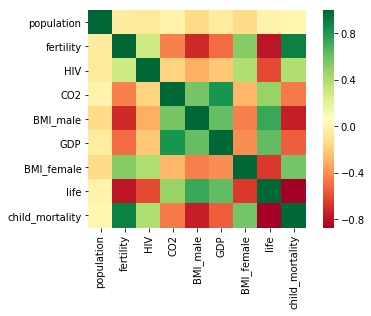

In [7]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn');

The heatmap shows a **negative** correlation between life expectancy and fertility, which is confirmed by the scatter plot

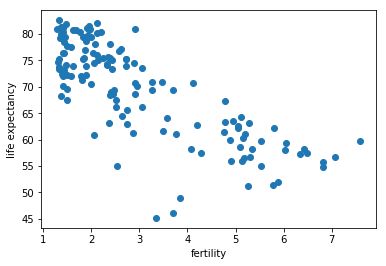

In [8]:
# plot 'fertility' vs 'life' expectancy
plt.scatter(X_fertility, y)
plt.xlabel('fertility')
plt.ylabel('life expectancy')
plt.show()

0.6192442167740035


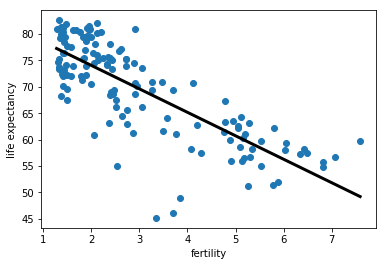

In [11]:
# instantiate the regressor
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 for single feature
print(reg.score(X_fertility, y))

# Overlay the plot with our linear regression line.
plt.scatter(X_fertility, y)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.xlabel('fertility')
plt.ylabel('life expectancy')
plt.show()

### Linear regression using multiple features

We'll split the dataset into training and testing sets. Train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This is true for classification models, and is equally true for linear regression models.

We'll then fit and predict a linear regression over **all features**. In addition to computing the **R^2 score**, we will also compute the **Root Mean Squared Error (RMSE)**, which is another commonly used metric to evaluate regression models.

In [23]:
# drop 'Region' since it's not numeric
X = df.drop(['life', 'Region'], axis=1).values
print(type(X), X.shape)

<class 'numpy.ndarray'> (139, 8)


In [24]:
print(type(y), y.shape)

<class 'numpy.ndarray'> (139, 1)


In [25]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)
y_pred[:5]

array([[69.78523121],
       [71.71746546],
       [75.4383211 ],
       [63.01395864],
       [78.52729433]])

Compute the **RMSE**. To do this, first compute the **Mean Squared Error** using the `mean_squared_error()` function with the arguments `y_test` and `y_pred`, and then take its square root using `np.sqrt()`

In [27]:
# Compute and print R^2
print("R^2: {}".format(reg_all.score(X_test, y_test)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380468731430059
Root Mean Squared Error: 3.247601080037022


Using all features in the model has led to an improvement in the R^2 score from 62%(single feature) to 83%.